In [1]:
import tensorflow as tf; print('tensorflow version: ', tf.__version__)
import keras; print('keras version: ',keras.__version__)

tensorflow version:  2.2.0
keras version:  2.3.0-tf


Using TensorFlow backend.


In [48]:
import pandas as pd
import numpy as np
import IPython.display as ipd

In [109]:
# parent folder of sound files
INPUT_DIR="../input/heartbeat-sounds/"

In [17]:
!pwd
!ls -all ../input/heartbeat-sounds

/kaggle/working
total 136
drwxr-xr-x 4 nobody nogroup  4096 Jan 17 17:13 .
drwxr-xr-x 3 root   root     4096 Jul  4 00:48 ..
drwxr-xr-x 2 nobody nogroup 12288 Jan 17 17:13 set_a
-rw-r--r-- 1 nobody nogroup  7031 Jan 17 17:13 set_a.csv
-rw-r--r-- 1 nobody nogroup 17115 Jan 17 17:13 set_a_timing.csv
drwxr-xr-x 2 nobody nogroup 45056 Jan 17 17:13 set_b
-rw-r--r-- 1 nobody nogroup 42145 Jan 17 17:13 set_b.csv


In [96]:
#for visuals of file naming conventions
!ls -all ../input/heartbeat-sounds/set_b

total 35040
drwxr-xr-x 2 nobody nogroup  45056 Jan 17 17:13 .
drwxr-xr-x 4 nobody nogroup   4096 Jan 17 17:13 ..
-rw-r--r-- 1 nobody nogroup  84854 Jan 17 17:13 Bunlabelledtest__101_1305030823364_A.wav
-rw-r--r-- 1 nobody nogroup 174298 Jan 17 17:13 Bunlabelledtest__101_1305030823364_D.wav
-rw-r--r-- 1 nobody nogroup  21378 Jan 17 17:13 Bunlabelledtest__101_1305030823364_F.wav
-rw-r--r-- 1 nobody nogroup  57882 Jan 17 17:13 Bunlabelledtest__103_1305031931979_A.wav
-rw-r--r-- 1 nobody nogroup  67516 Jan 17 17:13 Bunlabelledtest__103_1305031931979_C.wav
-rw-r--r-- 1 nobody nogroup  80452 Jan 17 17:13 Bunlabelledtest__105_1305033453095_B.wav
-rw-r--r-- 1 nobody nogroup 123662 Jan 17 17:13 Bunlabelledtest__105_1305033453095_D.wav
-rw-r--r-- 1 nobody nogroup  24382 Jan 17 17:13 Bunlabelledtest__106_1306776721273_B.wav
-rw-r--r-- 1 nobody nogroup  36188 Jan 17 17:13 Bunlabelledtest__106_1306776721273_D.wav
-rw-r--r-- 1 nobody nogroup  74046 Jan 17 17:13 Bunlabelledtest__107_1305654946865_B.w

# Basic Data Scoping
Gaining a sense of basic properties such as size, distribution, etc.

In [18]:
set_a=pd.read_csv(INPUT_DIR+"set_a.csv")
set_a.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [30]:
set_a.label.describe()

count          124
unique           4
top       artifact
freq            40
Name: label, dtype: object

In [19]:
set_b=pd.read_csv(INPUT_DIR+"set_b.csv")
set_b.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [31]:
set_b.label.describe()

count        461
unique         3
top       normal
freq         320
Name: label, dtype: object

In [37]:
frames = [set_a, set_b]
train_set=pd.concat(frames)
train_set.describe()

,dataset,fname,label,sublabel
count,832,832,585,149
unique,2,832,5,2
top,b,set_b/Bunlabelledtest_270_1309369533040_D.wav,normal,noisynormal
freq,656,1,351,120


In [38]:
classes=train_set.label.unique()

print("Number of training examples: ", train_set.shape[0])
print("Number of classes: ", len(classes))
print (classes)

Number of training examples:  832
Number of classes:  6
['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


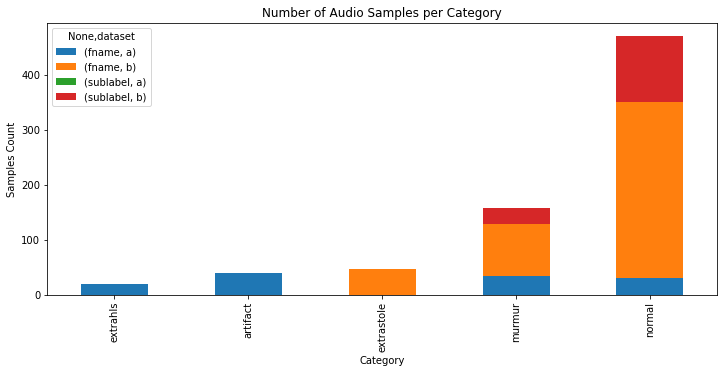

In [39]:
#data distribution
category_group = train_set.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(12,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count");

### Toggle function for easier experimentation

In [102]:
def leadingTag(tags, noisy, toggle, sets):
    s = tags[toggle] + "_"
    if noisy:
        s = s + "noisy" + tags[toggle]
    s += "_"
    if sets == "b":
        s = "set_b/" + s
    return s

# Normal Pulse Recordings

In [103]:
noisy = False
tags = ["normal", "murmur"]
toggle = 0
sets = 'b'
print(leadingTag(tags, noisy, toggle, sets))

set_b/normal__


In [75]:
#filter for normal sounds in set b
df_b_normal = set_b[set_b.label == "normal"]
df_b_normal.head()

,dataset,fname,label,sublabel
112,b,set_b/Btraining_normal_103_1305031931979_B.wav,normal,NaN
113,b,set_b/Btraining_normal_103_1305031931979_D1.wav,normal,NaN
114,b,set_b/Btraining_normal_103_1305031931979_D2.wav,normal,NaN
115,b,set_b/Btraining_normal_103_1305031931979_D3.wav,normal,NaN
116,b,set_b/Btraining_normal_106_1306776721273_B1.wav,normal,NaN


In [76]:
#filter for clean sounds in set b normal
df_b_normal_clean = df_b_normal[df_b_normal.sublabel != "noisynormal"]
df_b_normal_clean.head()

,dataset,fname,label,sublabel
112,b,set_b/Btraining_normal_103_1305031931979_B.wav,normal,NaN
113,b,set_b/Btraining_normal_103_1305031931979_D1.wav,normal,NaN
114,b,set_b/Btraining_normal_103_1305031931979_D2.wav,normal,NaN
115,b,set_b/Btraining_normal_103_1305031931979_D3.wav,normal,NaN
116,b,set_b/Btraining_normal_106_1306776721273_B1.wav,normal,NaN


### Checking Out Sound

In [104]:
n=1 #select one file to listen
files = np.random.choice(df_b_normal_clean.fname, n)
print(files[0])
#e.g. set_b/Btraining_normal_179_1307990076841_D.wav

start = s.find("normal_")
filename = leadingTag(tags, noisy, toggle, sets) + files[0][start:]
normal_file=INPUT_DIR+filename
print(normal_file)

set_b/Btraining_normal_261_1309353556003_B.wav
../input/heartbeat-sounds/set_b/normal__261_1309353556003_B.wav


##### Reading Audio

In [105]:
import librosa
x, sr = librosa.load(normal_file)
print(x.shape)
print(sr)

(65649,)
22050


##### Visualizing Audio

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

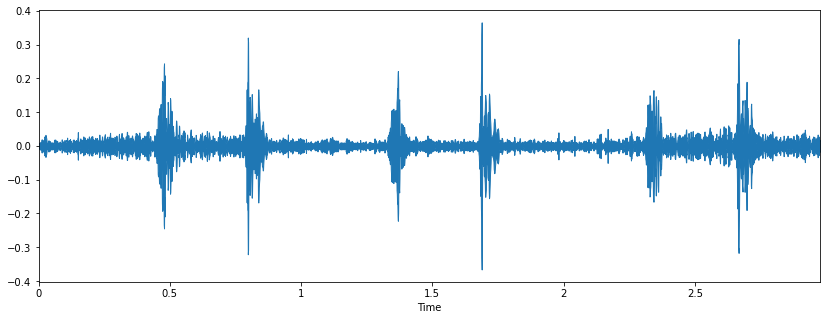

In [107]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

##### Hearing Audio

In [108]:
import IPython.display as ipd
ipd.Audio(normal_file)

# Basic Signal Processing